In [1]:
### Connecting to IBM db2 

import ibm_db_dbi
import ibm_db
import pandas


dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"          
dsn_hostname = "dashdb-txn-sbox-yp-lon02-07.services.eu-gb.bluemix.net"            
dsn_port = "50000"                   
dsn_protocol = "TCPIP"            
dsn_uid = "wxp42073"                 
dsn_pwd = "sgv85q2hl+9n3kkn" 

dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB as user:  wxp42073 on host:  dashdb-txn-sbox-yp-lon02-07.services.eu-gb.bluemix.net


In [2]:
# Maps the table from IBM db2 to a pandas dataframe
pconn = ibm_db_dbi.Connection(conn)
census_data = pandas.read_sql('SELECT * FROM CENSUS_DATA', pconn)
census_data

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [3]:
# Maps the table from IBM db2 to a pandas dataframe
pconn = ibm_db_dbi.Connection(conn)
crime_data = pandas.read_sql('SELECT * FROM CHICAGO_CRIME_DATA', pconn)
crime_data

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,FALSE,FALSE,...,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,FALSE,FALSE,...,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,FALSE,FALSE,...,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,FALSE,FALSE,...,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,FALSE,FALSE,...,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.773455,-87.706480,"(41.773455295, -87.706480471)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,10453948,HZ192829,2016-03-01,028XX E 79TH ST,1055,HUMAN TRAFFICKING,INVOLUNTARY SERVITUDE,APARTMENT,FALSE,FALSE,...,4,7.0,46.0,26,1196679.0,1853139.0,2016,41.751885,-87.554826,"(41.751885152, -87.554825997)"
529,10397129,HZ133234,2016-01-29,006XX W HARRISON ST,5114,NON - CRIMINAL,FOID - REVOCATION,STREET,FALSE,FALSE,...,1,2.0,28.0,26,1172257.0,1897564.0,2016,41.874363,-87.643013,"(41.874363279, -87.643013039)"
530,3269495,HJ747227,2003-11-08,012XX W 81ST ST,510,RITUALISM,AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY,OTHER,FALSE,FALSE,...,6,21.0,71.0,04B,1169648.0,1851076.0,2003,41.746852,-87.653941,"(41.746852486, -87.653941385)"
531,10840565,JA143710,2017-02-06,009XX N KARLOV AVE,5073,NON-CRIMINAL (SUBJECT SPECIFIED),NOTIFICATION OF CIVIL NO CONTACT ORDER,RESIDENCE,FALSE,TRUE,...,11,37.0,23.0,26,1148881.0,1905963.0,2017,41.897895,-87.728622,"(41.89789489, -87.728622316)"


In [4]:
# Maps the table from IBM db2 to a pandas dataframe
pconn = ibm_db_dbi.Connection(conn)
school_data = pandas.read_sql('SELECT * FROM CHICAGO_PUBLIC_SCHOOLS', pconn)
school_data

,School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,NDA,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,91.8,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,610172,William T Sherman Elementary School,ES,1000 W 52nd St,Chicago,IL,60609,(773) 535-1757,http://schoolreports.cps.edu/SchoolProgressRep...,AUSL Schools,...,NDA,1170500.817,1870373.159,41.799788,-87.650255,61,NEW CITY,16,9,"(41.79978772, -87.65025483)"
562,609844,William W Carter Elementary School,ES,5740 S Michigan Ave,Chicago,IL,60637,(773) 535-0860,http://schoolreports.cps.edu/SchoolProgressRep...,Burnham Park Elementary Network,...,NDA,1178101.365,1866810.123,41.789841,-87.622490,40,WASHINGTON PARK,20,2,"(41.78984129, -87.62248974)"
563,610088,Wolfgang A Mozart Elementary School,ES,2200 N Hamlin Ave,Chicago,IL,60647,(773) 534-4160,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NDA,1150644.396,1914368.955,41.920927,-87.721925,22,LOGAN SQUARE,35,25,"(41.92092734, -87.72192541)"
564,609977,Woodlawn Community Elementary School,ES,6657 S Kimbark Ave,Chicago,IL,60637,(773) 535-0801,http://schoolreports.cps.edu/SchoolProgressRep...,Burnham Park Elementary Network,...,NDA,1185825.188,1860883.579,41.773400,-87.594356,42,WOODLAWN,5,3,"(41.77339962, -87.59435584)"


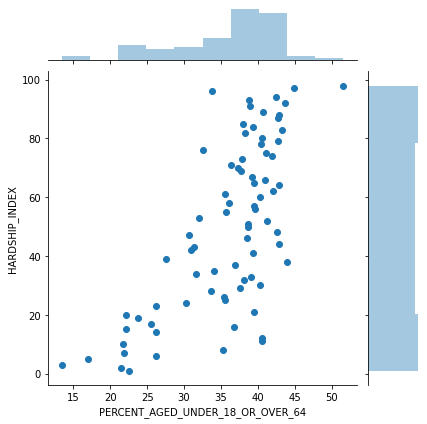

In [5]:
# Visualization with Dataframe
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plot = sns.jointplot(data = census_data, x = "PERCENT_AGED_UNDER_18_OR_OVER_64", y = "HARDSHIP_INDEX")
